# Predicting different types of fruits

# Exploratory Data Analysis

In this problem, Several machine learning algorithms will be implemented.Using a simple dataset for the task of training a classifier to distinguish between different types of fruits.
The purpose of this problem is to identify the machine learning algorithm that is best-suited to predict or classify different types of fruits; thus, it is best to compare different algorithms, selecting the best-performing one.

#### Libraries

In [128]:
import pandas as pd
import numpy as np


'''Plotting'''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#### Loading data

In [129]:
df = pd.read_table('fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Insights

In [130]:
print ('Column names in the dataset', df.columns)
print ('___'*25)
print ('The dimensions of the dataset:', df.shape)
print ('___'*25)
print ('Summary of the dataframe', df.info())
print ('___'*25)
print ('Column types count\n' ,df.dtypes.value_counts())

Column names in the dataset Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')
___________________________________________________________________________
The dimensions of the dataset: (59, 7)
___________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB
Summary of the dataframe None
__________________________________________________________________

In [131]:
#unique feature items
for i in df.columns:
    print('__'*25)
    print ('Unique items in {0}: {1}'.format(i, df[i].unique()))

__________________________________________________
Unique items in fruit_label: [1 2 3 4]
__________________________________________________
Unique items in fruit_name: ['apple' 'mandarin' 'orange' 'lemon']
__________________________________________________
Unique items in fruit_subtype: ['granny_smith' 'mandarin' 'braeburn' 'golden_delicious' 'cripps_pink'
 'spanish_jumbo' 'selected_seconds' 'turkey_navel' 'spanish_belsan'
 'unknown']
__________________________________________________
Unique items in mass: [192 180 176  86  84  80  76 178 172 166 154 164 152 156 168 162 160 140
 170 342 356 362 204 158 210 190 142 150 144 194 200 186 216 196 174 132
 130 116 118 120]
__________________________________________________
Unique items in width: [8.4 8.  7.4 6.2 6.  5.8 5.9 7.1 6.9 7.  7.3 7.6 7.7 7.5 9.  9.2 9.6 6.7
 7.8 7.2 6.8 6.1 6.3 6.5]
__________________________________________________
Unique items in height: [ 7.3  6.8  7.2  4.7  4.6  4.3  4.   7.8  7.   7.6  7.1  7.7  7.5  7.4
  7.

#### Identifying missing values

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

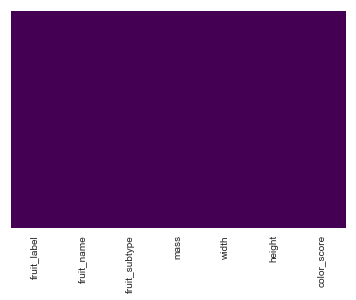

In [132]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

df.isnull().sum()

#### Statistical Summary and Identifying anomalies

In [133]:
# Descriptive statistics for each numerical features
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


The numerical values do not have the same scale. Scalling is required for this dataset. There are no data points that immediately appear as anomalous and no zeros in any of the measurement columns. 

#### Data Balance

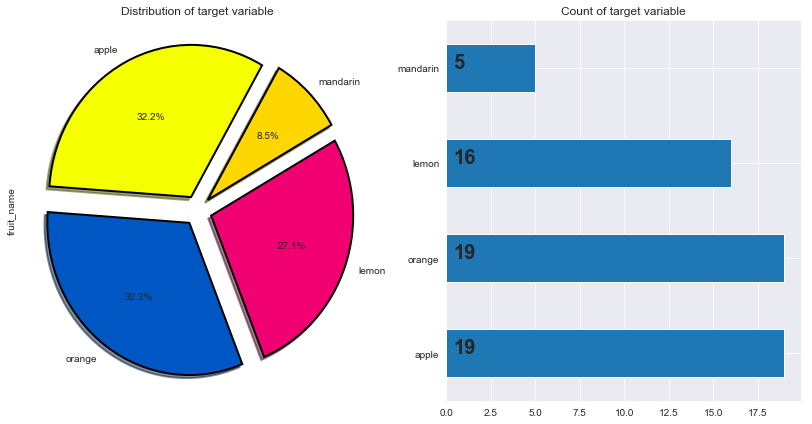

In [134]:
plt.figure(figsize=(14,7))
plt.subplot(121)
df["fruit_name"].value_counts().plot.pie(autopct="%.1f%%",colors = sns.color_palette("prism",7),
                                         wedgeprops={"linewidth":2,"edgecolor":"k"},startangle = 60,explode=[.1]*4,shadow =True)


plt.title("Distribution of target variable")

plt.subplot(122)
ax = df["fruit_name"].value_counts().plot(kind="barh")

for i,j in enumerate(df["fruit_name"].value_counts().values):
    ax.text(.4,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.savefig('fruits_balance')
plt.show()

The data is pretty much balanced except mandarin

#### Checking the distribution of the features

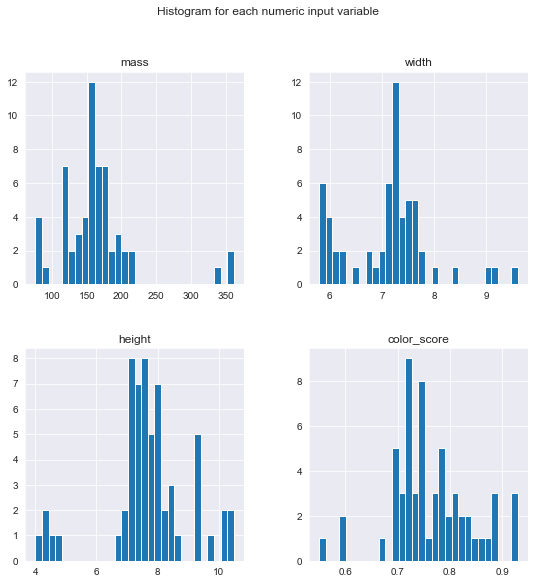

In [135]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_dist')
plt.show()

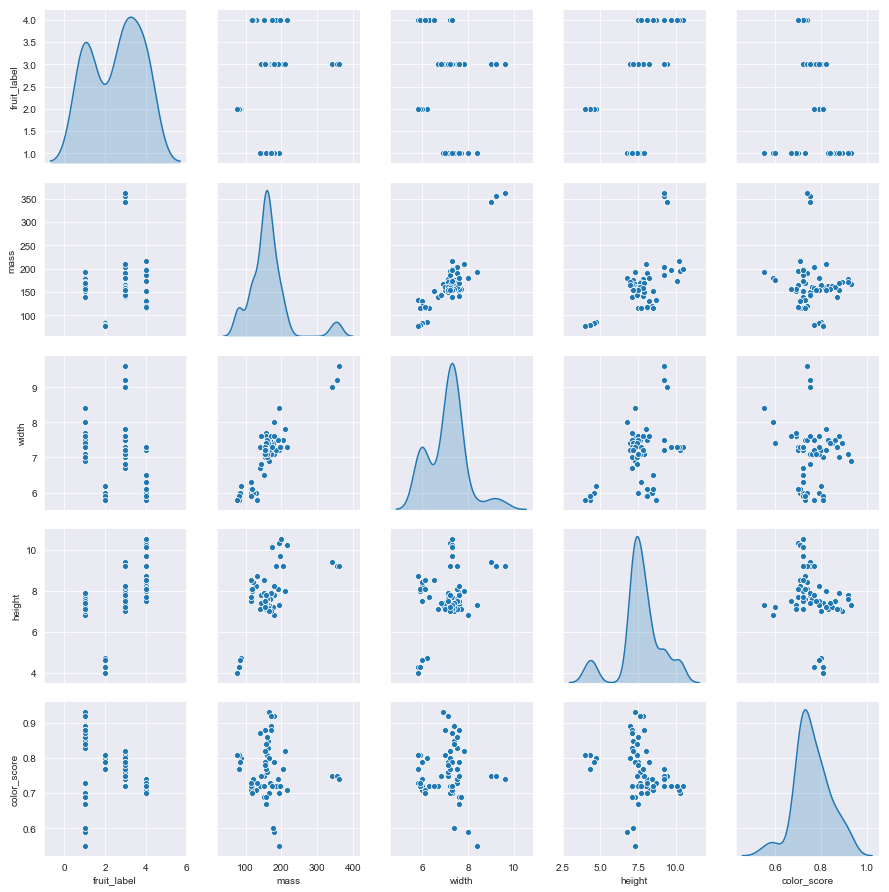

In [136]:
sns.pairplot(df,diag_kind='kde')

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship. Thus a presence of multicollinearity

#### Correlation Matrix

In [137]:
corr = df.corr()
corr

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


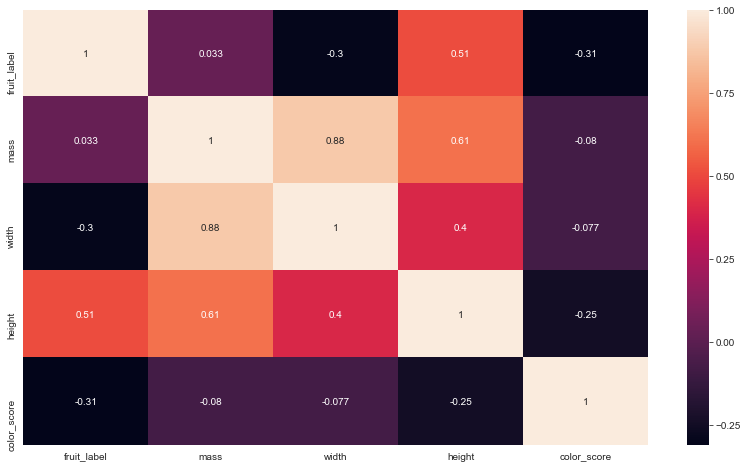

In [145]:
def plot_corr(df, size=9):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plt.figure(figsize=(14,8))
plt.savefig('fruits_corrmatx')
sns.heatmap(corr,annot=True)

#### Converting categorical variables into numerical variables

Using one hot encodeing for a baseline model

In [139]:
# One-hot encode the data using pandas get_dummies
df = pd.get_dummies(df)
# Display the first 5 rows of the last 12 columns
df.iloc[:,5:].head(5)

,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [140]:
df.head()

,fruit_label,mass,width,height,color_score,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,1,192,8.4,7.3,0.55,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,180,8.0,6.8,0.59,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,176,7.4,7.2,0.60,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,86,6.2,4.7,0.80,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,2,84,6.0,4.6,0.79,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [141]:
# Labels are the values we want to predict
labels = np.array(df['fruit_label'])
# Remove the labels from the features
# axis 1 refers to the columns
df= df.drop('fruit_label', axis = 1)
# Saving feature names for later use
df_list = list(df.columns)
# Convert to numpy array
df = np.array(df)

In [142]:
df#Converted data that will be used in the baseline model

array([[192. ,   8.4,   7.3, ...,   0. ,   0. ,   0. ],
       [180. ,   8. ,   6.8, ...,   0. ,   0. ,   0. ],
       [176. ,   7.4,   7.2, ...,   0. ,   0. ,   0. ],
       ...,
       [116. ,   5.9,   8.1, ...,   0. ,   0. ,   1. ],
       [152. ,   6.5,   8.5, ...,   0. ,   0. ,   1. ],
       [118. ,   6.1,   8.1, ...,   0. ,   0. ,   1. ]])